# First exploration of the titanic data set

Quick experimentation to see what needs to be done to clean the datasets.

Things checked:
1. missing values
2. simplistic features that can be added

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm # Progress bar

### 1. Read in the data

In [2]:
train = pd.read_csv('../Data/train.csv')
gender = pd.read_csv('../Data/gender_submission.csv')

### 2. Describe the data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3. Analyse missing values

There are different options to resolve the missing values
1. Remove any records with missing data
2. Imputation with the mean value (or some other schematics)
3. Imputation with a random value within the distribution (should not necessarily be uniform)
4. Imputatation with a smarter method (KNN Imputer)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 3.1 Age

In [7]:
# Look at the data with missing Age information
train[train['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


<AxesSubplot:>

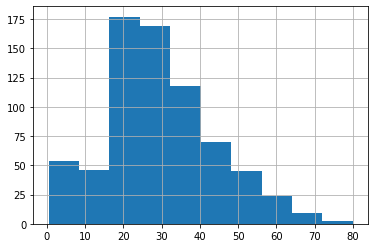

In [8]:
train['Age'].hist()

In [9]:
# Using a random integer in the distribution of ages
# Should *not* be used as the distribution does not match
train_age = np.random.randint(train['Age'].mean() - train['Age'].std(),
                              train['Age'].mean() + train['Age'].std(),
                              177
                             )

(array([12., 17., 18., 14., 15., 19., 16., 29., 21., 16.]),
 array([15. , 17.8, 20.6, 23.4, 26.2, 29. , 31.8, 34.6, 37.4, 40.2, 43. ]),
 <BarContainer object of 10 artists>)

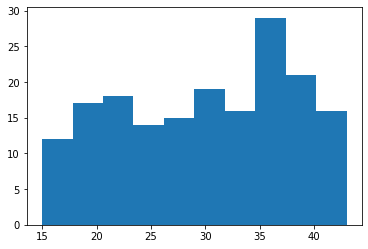

In [10]:
plt.hist(train_age)

(array([0.00125086, 0.0125086 , 0.03252236, 0.05128526, 0.0125086 ,
        0.05503784, 0.02376634, 0.01125774, 0.00500344, 0.01626118]),
 array([ 9.66666667, 14.18333333, 18.7       , 23.21666667, 27.73333333,
        32.25      , 36.76666667, 41.28333333, 45.8       , 50.31666667,
        54.83333333]),
 <BarContainer object of 10 artists>)

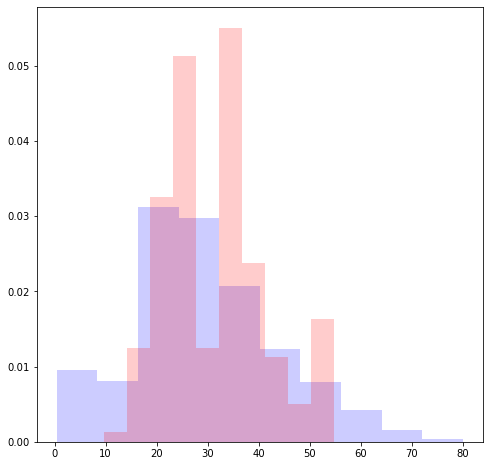

In [11]:
# Data imputer using a K-nearest neighbours method
# Should be smarter as it learns the distribution of the data
# Beware: results depend on how many columns you provide to the KNNImputer and return after the fit_transform
# Note: needs label encoder, as string objects are not allowed
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Encoding
temp = train.copy(deep=True)
pre_columns = ["Sex", "Embarked"]
encoders = {}
for cc in pre_columns:
    encoder = LabelEncoder()
    temp[cc] = encoder.fit_transform(temp[cc].astype("str"))
    encoders[cc] = encoder

# Reference columns
x_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked'] # Cabin would be too difficult to include
imputer = KNNImputer(n_neighbors=3, 
                     weights='uniform',
                     add_indicator=True
                    )
train_age = pd.DataFrame(imputer.fit_transform(temp[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked']]),
                         columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked', 'MissingValue']
                        )
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.hist(train_age[train_age['MissingValue']==0.]['Age'], 10, color='b', alpha=.2, density=True)
ax.hist(train_age[train_age['MissingValue']==1.]['Age'], 10, color='r', alpha=.2, density=True)

#### 3.2 Cabin

In [12]:
# Look at the data with missing Cabin information
train[train['Cabin'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [13]:
# Probably not super important initially, but would probably be important later.  
# Also quite difficult to determine which cabin would correspond to which passenger class (Pclass)
# -> KNNImputer might resolve this (partially?)

In [14]:
train[['Pclass', 'Cabin']].groupby(['Pclass', 'Cabin'], as_index=False).value_counts().sort_values('count', ascending=False)

,Pclass,Cabin,count
146,3,G6,4
47,1,B96 B98,4
63,1,C23 C25 C27,4
133,2,D,3
135,2,E101,3
...,...,...,...
48,1,C101,1
46,1,B94,1
45,1,B86,1
44,1,B82 B84,1


In [15]:
# Get a list of the cabin per passenger class
train.groupby('Pclass')['Cabin'].agg(list)#.to_frame('list_of_cabins')

Pclass
1    [C85, C123, E46, C103, A6, C23 C25 C27, nan, B...
2    [nan, nan, nan, nan, D56, nan, nan, nan, nan, ...
3    [nan, nan, nan, nan, nan, nan, G6, nan, nan, n...
Name: Cabin, dtype: object

#### 3.3 Embarked

In [16]:
# Look at the data with missing Cabin information
train[train['Embarked'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


(array([38., 49., 90.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

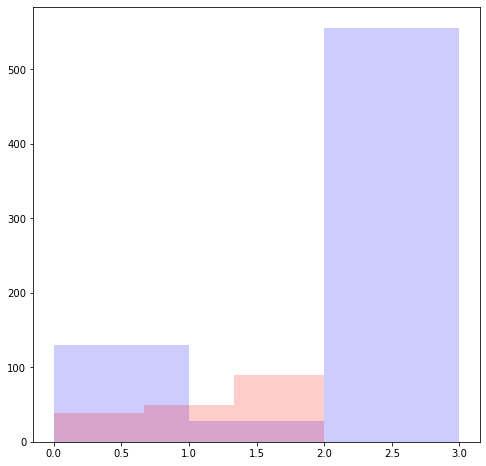

In [17]:
# Data imputer using a K-nearest neighbours method
# Should be smarter as it learns the distribution of the data
# Beware: results depend on how many columns you provide to the KNNImputer and return after the fit_transform
# Note: needs label encoder, as string objects are not allowed
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Encoding
temp = train.copy(deep=True)
pre_columns = ["Sex", "Embarked"]
encoders = {}
for cc in pre_columns:
    encoder = LabelEncoder()
    temp[cc] = encoder.fit_transform(temp[cc].astype("str"))
    encoders[cc] = encoder

# Reference columns
x_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked'] # Cabin would be too difficult to include
imputer = KNNImputer(n_neighbors=3, 
                     weights='uniform',
                     add_indicator=True
                    )
train_age = pd.DataFrame(imputer.fit_transform(temp[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked']]),
                         columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked', 'MissingValue']
                        )
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.hist(train_age[train_age['MissingValue']==0.]['Embarked'], 3, color='b', alpha=.2)
ax.hist(train_age[train_age['MissingValue']==1.]['Embarked'], 3, color='r', alpha=.2)

#### 3.5 Zero fare price
Might actually not be any missing data and be true instead

In [18]:
(train
 .groupby('Pclass')
 .agg(min_fare=('Fare', np.min),
      max_fare=('Fare', np.max),
      median_fare=('Fare', np.median),
      mean_fare=('Fare', np.mean)
     )
)

,min_fare,max_fare,median_fare,mean_fare
Pclass,,,,
1,0.0,512.3292,60.2875,84.154687
2,0.0,73.5000,14.2500,20.662183
3,0.0,69.5500,8.0500,13.675550


In [19]:
train[train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


### 4. Determine new features

#### 4.1 Family size

In [20]:
train['familysize'] = train['SibSp'] + train['Parch'] + 1
temp['familysize'] = temp['SibSp'] + temp['Parch'] + 1

In [21]:
temp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,1


#### 4.2 Kid, adult, senior

In [22]:
# Note: not accounting for NaNs, so these are all "adult"
train['agegroup'] = ['child' if vv < 18 else 'elderly' if vv >= 65 else 'adult' for vv in train['Age']]

In [23]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familysize,agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,adult


#### 4.3 Has children
Might nog work for adults traveling with their adult parents

In [24]:
train['haschildren'] = train.apply(lambda row : (row['agegroup'] == 'adult') & (row['Parch'] > 0), axis=1)

#### 4.4 Single child

In [25]:
train['issinglechild'] = train.apply(lambda row : (row['agegroup'] == 'child') & (row['SibSp'] == 0), axis=1)

#### 4.5 Has parent
Is a check warranted where Parch > 2?

In [26]:
train['hasparent'] = train.apply(lambda row : (row['agegroup'] == 'child') & (row['Parch'] > 0), axis=1)

#### 4.6 Has spouse

Unclear what to do if peron is adult and sibsp > 1 (siblings!)

In [27]:
train['hasspouse'] = train.apply(lambda row : (row['agegroup'] != 'child') & (row['SibSp'] > 0), axis=1)

### 5. Correlations

As expected:
Strong correlations between:
- Fare and Pclass
- Survived and Sex
- Survived and Pclass

Less expected:
Correlations between:
- Age and Pclass


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  familysize     891 non-null    int64  
 13  agegroup       891 non-null    object 
 14  haschildren    891 non-null    bool   
 15  issinglechild  891 non-null    bool   
 16  hasparent      891 non-null    bool   
 17  hasspouse      891 non-null    bool   
dtypes: bool(4)

In [29]:
# Encoding
temp = train.copy(deep=True)
# pre_columns should be dynamically retrieved from train.types
pre_columns = ['Sex', 'Embarked', 'agegroup', 'haschildren', 'issinglechild', 'hasparent','hasspouse']
encoders = {}
for cc in pre_columns:
    encoder = LabelEncoder()
    temp[cc] = encoder.fit_transform(temp[cc].astype("str"))
    encoders[cc] = encoder

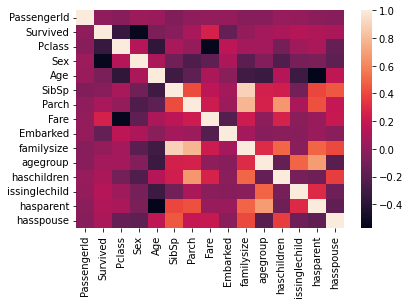

In [30]:
ax = sns.heatmap(temp.corr())

In [31]:
temp.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,familysize,agegroup,haschildren,issinglechild,hasparent,hasspouse
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,0.013083,-0.040143,-0.031600,0.021174,0.017428,-0.016954,-0.030119
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.163517,0.016639,0.065919,0.092186,0.123781,0.111659,0.093298
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.157112,0.065997,0.062902,-0.099396,0.048435,0.093443,-0.156642
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.104057,-0.200988,-0.044555,-0.240827,-0.096973,-0.077265,-0.186931
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.025252,-0.301914,-0.326627,0.134991,-0.317472,-0.569654,0.169231
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.066654,0.890712,0.250750,0.233689,-0.106860,0.398991,0.452691
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.038322,0.783111,0.254398,0.668512,0.088351,0.426898,0.185274
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.221226,0.217138,-0.010604,0.261424,-0.027412,0.026274,0.201897
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.221226,1.000000,0.064701,-0.031521,-0.024167,-0.034075,0.036216,-0.025683
familysize,-0.040143,0.016639,0.065997,-0.200988,-0.301914,0.890712,0.783111,0.217138,0.064701,1.000000,0.298473,0.493696,-0.028896,0.485968,0.401958


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,familysize,agegroup,haschildren,issinglechild,hasparent,hasspouse
PassengerId,1.000000,0.047225,-0.125401,0.116756,0.002274,-0.136849,-0.067946,0.043981,-0.021062,-0.131265,NaN,NaN,0.102533,0.017002,NaN
Survived,0.047225,1.000000,-0.463858,-0.295191,-0.208059,-0.461483,-0.027620,0.121587,-0.201255,-0.366221,NaN,NaN,0.175084,0.050220,NaN
Pclass,-0.125401,-0.463858,1.000000,0.134445,-0.042002,0.337282,-0.074172,-0.697848,-0.045924,0.231868,NaN,NaN,-0.111156,-0.067233,NaN
Sex,0.116756,-0.295191,0.134445,1.000000,-0.031635,0.156523,0.020460,-0.046951,0.220526,0.128420,NaN,NaN,-0.111983,0.055990,NaN
Age,0.002274,-0.208059,-0.042002,-0.031635,1.000000,-0.243049,-0.483034,-0.017819,-0.124849,-0.370577,NaN,NaN,0.320215,-0.651638,NaN
SibSp,-0.136849,-0.461483,0.337282,0.156523,-0.243049,1.000000,0.447822,0.075561,0.215066,0.940734,NaN,NaN,-0.707021,0.445650,NaN
Parch,-0.067946,-0.027620,-0.074172,0.020460,-0.483034,0.447822,1.000000,0.329930,0.269482,0.724519,NaN,NaN,-0.349757,0.831069,NaN
Fare,0.043981,0.121587,-0.697848,-0.046951,-0.017819,0.075561,0.329930,1.000000,0.110362,0.183392,NaN,NaN,-0.122486,0.250968,NaN
Embarked,-0.021062,-0.201255,-0.045924,0.220526,-0.124849,0.215066,0.269482,0.110362,1.000000,0.268005,NaN,NaN,-0.090338,0.225387,NaN
familysize,-0.131265,-0.366221,0.231868,0.128420,-0.370577,0.940734,0.724519,0.183392,0.268005,1.000000,NaN,NaN,-0.677688,0.658768,NaN


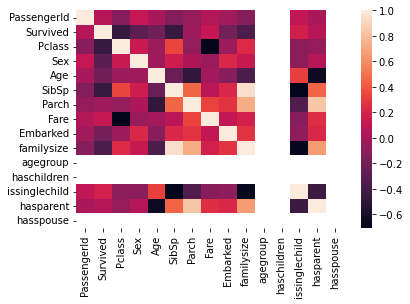

In [36]:
display(temp[temp['Age'] < 18].corr())
ax = sns.heatmap(temp[temp['Age'] < 18].corr())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,familysize,agegroup,haschildren,issinglechild,hasparent,hasspouse
PassengerId,1.000000,-0.008790,-0.117476,NaN,0.085899,0.000869,0.113805,0.063155,0.016953,0.066872,-0.063698,0.171634,-0.010736,-0.024335,0.036545
Survived,-0.008790,1.000000,-0.477114,NaN,0.116109,-0.263284,-0.223644,0.218466,-0.166437,-0.303717,-0.053853,-0.080324,0.060029,-0.093680,-0.044069
Pclass,-0.117476,-0.477114,1.000000,NaN,-0.386217,0.136263,0.143976,-0.634771,0.151748,0.173635,0.178569,-0.025897,0.086523,0.147726,-0.127841
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,0.085899,0.116109,-0.386217,NaN,1.000000,-0.241442,-0.118539,0.171468,0.011243,-0.219197,-0.685348,0.226540,-0.381288,-0.621175,0.300545
SibSp,0.000869,-0.263284,0.136263,NaN,-0.241442,1.000000,0.295385,0.093852,0.119968,0.830794,0.201833,0.163693,-0.172971,0.284291,0.442196
Parch,0.113805,-0.223644,0.143976,NaN,-0.118539,0.295385,1.000000,0.073398,0.135553,0.777148,0.174489,0.665414,0.028260,0.308959,0.086370
Fare,0.063155,0.218466,-0.634771,NaN,0.171468,0.093852,0.073398,1.000000,-0.211172,0.104581,-0.093088,0.151224,-0.077411,-0.051443,0.146104
Embarked,0.016953,-0.166437,0.151748,NaN,0.011243,0.119968,0.135553,-0.211172,1.000000,0.157994,-0.053938,0.085360,-0.045724,0.066446,0.043166
familysize,0.066872,-0.303717,0.173635,NaN,-0.219197,0.830794,0.777148,0.104581,0.157994,1.000000,0.234602,0.495480,-0.097474,0.367257,0.341596


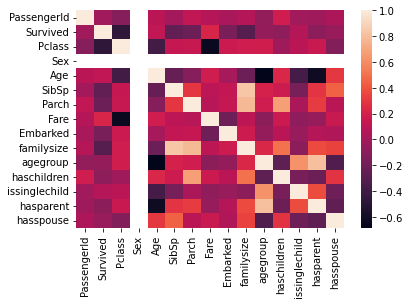

In [37]:
display(temp[temp['Sex'] == 0].corr())
ax = sns.heatmap(temp[temp['Sex'] == 0].corr())